<a href="https://colab.research.google.com/github/jpcompartir/dl_notebooks/blob/main/colab_workflows_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install transformers --quiet
!pip install umap-learn --quiet
!pip install sentence_transformers --quiet

In [ ]:
import transformers
from transformers import AutoTokenizer, AutoModelForTokenClassification, AutoModelForSequenceClassification, TextClassificationPipeline
from transformers import pipeline
from sentence_transformers import SentenceTransformer, util

from google.colab import drive

import time
import numpy as np
import pandas as pd
import os
import torch
import umap

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data_colab/tn_ar_us_clipped.csv")

In [ ]:
df.head

<bound method NDFrame.head of                                                     text  new_id
0      There are Whales, There are large investment f...       1
1      @adrian_ivl @kuraine @tanikumi Bring back C418...       2
2      @cryptocom You must open margin trading again ...       3
3      And if I go back to 80's what idiots let relea...       4
4      @ichimokudoc Time to sell and short the market...       5
...                                                  ...     ...
47843  I know exactly why i get ads for stock trading...   47844
47844  When you sell digital currency for fiat curren...   47845
47845  Cococokie said: When i say there is nothing th...   47846
47846  I will try to write a whole thread on this str...   47847
47847  Array Out of Range Problem\nHi all,\nI am comi...   47848

[47848 rows x 2 columns]>

In [ ]:
texts = df["text"].tolist()

In [ ]:
%%capture
#Get sentence model
mpnet = SentenceTransformer("all-mpnet-base-v2")

In [ ]:
mpnet = mpnet.cuda()

In [ ]:
embeddings = mpnet.encode(df["text"], show_progress_bar=True, batch_size=128, device = 0)


Batches:   0%|          | 0/374 [00:00<?, ?it/s]

In [ ]:
data = pd.DataFrame(embeddings)

In [ ]:
data.head

<bound method NDFrame.head of             0         1         2         3         4         5         6    \
0      0.026485 -0.033820 -0.015947 -0.029262  0.067772 -0.012595  0.043034   
1      0.026080  0.042159 -0.003373 -0.009852  0.028531 -0.044802 -0.019082   
2     -0.034258  0.021451 -0.030782  0.000553  0.061282 -0.013792  0.061802   
3      0.010006  0.091385  0.013394  0.002038 -0.002925 -0.012558  0.036557   
4     -0.018714 -0.008092 -0.035511 -0.024580  0.053955 -0.004057 -0.039893   
...         ...       ...       ...       ...       ...       ...       ...   
47843 -0.002079  0.048283 -0.013947 -0.075184  0.062359  0.007090  0.029112   
47844  0.038814  0.036078 -0.024570  0.034043  0.039380 -0.001938  0.101123   
47845  0.012245  0.041654 -0.018376 -0.055632  0.066711  0.029246  0.085108   
47846  0.030203 -0.041420 -0.021506 -0.022243  0.021865 -0.016102  0.017094   
47847 -0.025564 -0.041199 -0.026990 -0.002519  0.083714  0.001894  0.027810   

            7        

In [ ]:
# data.to_csv("551_sample_embeddings_v2.csv")

In [ ]:
# !cp "551_sample_embeddings_v2.csv" "/content/drive/MyDrive/Data Science Project Work/Microsoft/Project Work/551_sustainability/data/551_sample_embeddings_v2.csv"

In [ ]:
reducer = umap.UMAP(random_state=42, n_neighbors=10, verbose = True)

In [ ]:
start = time.time()
umap = reducer.fit_transform(embeddings)
end = time.time()

end - start

UMAP(n_neighbors=10, random_state=42, verbose=True)
Mon Nov  7 14:55:40 2022 Construct fuzzy simplicial set
Mon Nov  7 14:55:40 2022 Finding Nearest Neighbors
Mon Nov  7 14:55:40 2022 Building RP forest with 16 trees
Mon Nov  7 14:55:45 2022 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	 5  /  16
	 6  /  16
	 7  /  16
	 8  /  16
	Stopping threshold met -- exiting after 8 iterations
Mon Nov  7 14:56:01 2022 Finished Nearest Neighbor Search
Mon Nov  7 14:56:04 2022 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Mon Nov  7 14:56:54 2022 Finished embedding


74.85040259361267

In [ ]:
umap_df = pd.DataFrame(umap)


In [ ]:
umap_df

,0,1
0,10.149199,6.279799
1,5.642390,7.077702
2,11.640479,5.683624
3,3.575024,4.391333
4,9.576430,8.643975
...,...,...
47843,9.785522,6.678511
47844,7.605739,4.073271
47845,6.673262,3.248573
47846,11.332233,5.731156


In [ ]:
umap_df['new_id'] = df["new_id"]

In [ ]:
umap_df.to_csv("tn_umap_reduced.csv")

In [ ]:
!cp "tn_umap_reduced.csv" "/content/drive/MyDrive/Data Science Project Work/Trade Nation/project_work/audience_refresh/data/tn_umap_reduced.csv"

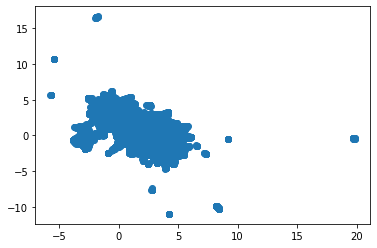

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(umap_df[0], umap_df[1], cmap = "spectral")
plt.show()

In [ ]:
# umap_df.to_csv("551_umap_30_python.csv", index = False)
# !cp "551_umap_30_python.csv" "/content/drive/MyDrive/Data Science Project Work/Microsoft/Project Work/551_sustainability/data/551_umap_30.csv"

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(embeddings)

In [ ]:
clusters = kmeans.fit_transform(embeddings)

In [ ]:
clusters =pd.DataFrame(kmeans.labels_)

In [ ]:
umap_df["cluster"] = clusters[0]
umap_df["universal_message_id"] = df["universal_message_id"]
umap_df["date"] = df["date"]

In [ ]:
umap_df

In [ ]:
# clusters.to_csv("551_clusters_sklearn.csv")

In [ ]:
# !cp "551_clusters_sklearn.csv" "/content/drive/MyDrive/Data Science Project Work/Microsoft/Project Work/551_sustainability/data/551_kmeans_python.csv"

In [ ]:
# pd.DataFrame(clusters)

Get sentiment while here:

In [ ]:
%%capture
model_id = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_id, max_length = 450, truncation = True, padding = True, return_tensors = "pt")
model = AutoModelForSequenceClassification.from_pretrained(model_id)
model.to('cuda')
tokenizer.model_max_length = 511

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
pipe = TextClassificationPipeline(tokenizer = tokenizer, model = model, device = 0, return_all_scores = True, max_length = 512, truncation = True, padding = True, verbose = True)

/usr/local/lib/python3.7/dist-packages/transformers/pipelines/text_classification.py:92: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  UserWarning,


In [ ]:
results = pipe(df["message"].tolist())

In [ ]:
sentiment = pd.DataFrame(results)

<bound method NDFrame.head of                                                        0  \
0      {'label': 'Negative', 'score': 0.0165733285248...   
1      {'label': 'Negative', 'score': 0.0106464391574...   
2      {'label': 'Negative', 'score': 0.8923171758651...   
3      {'label': 'Negative', 'score': 0.3695480823516...   
4      {'label': 'Negative', 'score': 0.1830233037471...   
...                                                  ...   
11599  {'label': 'Negative', 'score': 0.3556941151618...   
11600  {'label': 'Negative', 'score': 0.0205883029848...   
11601  {'label': 'Negative', 'score': 0.9421704411506...   
11602  {'label': 'Negative', 'score': 0.0118754431605...   
11603  {'label': 'Negative', 'score': 0.9179616570472...   

                                                       1  \
0      {'label': 'Neutral', 'score': 0.20349811017513...   
1      {'label': 'Neutral', 'score': 0.23623375594615...   
2      {'label': 'Neutral', 'score': 0.09429983794689...   
3      {'

In [ ]:
sentiment.columns = ["negative", "neutral", "positive"]

In [ ]:
sentiment["negative"].str.extract(r"'score': (\d+\.\d+)", expand=False)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
11599   NaN
11600   NaN
11601   NaN
11602   NaN
11603   NaN
Name: negative, Length: 11604, dtype: float64

In [ ]:
umap_df["negative"] = sentiment["negative"]
umap_df["positive"] = sentiment["positive"]
umap_df["neutral"] = sentiment["neutral"]
umap_df.head

<bound method NDFrame.head of               0         1  cluster  \
0      4.572609 -1.201144        1   
1     -1.382660  1.951915        4   
2     -1.910355  2.490575        4   
3      0.746951  3.075345        3   
4      1.110697  2.244775        2   
...         ...       ...      ...   
11599  1.873953 -0.422931        5   
11600  4.180357 -2.018442        1   
11601 -0.050218  1.089579        4   
11602  0.311266 -1.254390        0   
11603  1.679388  1.887412        4   

                              universal_message_id        date  \
0                    TWITTER_2_1520654001179553792  2022-05-01   
1      WEB_100_sg_D61208C61FB9E9AA3C8879A7737F3E16  2022-05-01   
2                    TWITTER_7_1520567797335482373  2022-05-01   
3                    TWITTER_7_1520563768740040704  2022-05-01   
4                    TWITTER_7_1520562840582643713  2022-05-01   
...                                            ...         ...   
11599                TWITTER_2_1443823137632759823 

Get entities

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification

In [ ]:
nlp = pipeline("ner", model="xlm-roberta-large-finetuned-conll03-english", device = 0,  aggregation_strategy = "simple")

Downloading:   0%|          | 0.00/852 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [ ]:
entities = nlp(df["message"].tolist())

In [ ]:
entities = pd.DataFrame(entities)

In [ ]:
entities.head

In [ ]:
umap_df

,0,1,cluster,universal_message_id,date,negative,positive,neutral
0,4.572609,-1.201144,1,TWITTER_2_1520654001179553792,2022-05-01,"{'label': 'Negative', 'score': 0.0165733285248...","{'label': 'Positive', 'score': 0.7799286246299...","{'label': 'Neutral', 'score': 0.20349811017513..."
1,-1.382660,1.951915,4,WEB_100_sg_D61208C61FB9E9AA3C8879A7737F3E16,2022-05-01,"{'label': 'Negative', 'score': 0.0106464391574...","{'label': 'Positive', 'score': 0.7531198263168...","{'label': 'Neutral', 'score': 0.23623375594615..."
2,-1.910355,2.490575,4,TWITTER_7_1520567797335482373,2022-05-01,"{'label': 'Negative', 'score': 0.8923171758651...","{'label': 'Positive', 'score': 0.0133829265832...","{'label': 'Neutral', 'score': 0.09429983794689..."
3,0.746951,3.075345,3,TWITTER_7_1520563768740040704,2022-05-01,"{'label': 'Negative', 'score': 0.3695480823516...","{'label': 'Positive', 'score': 0.0822667405009...","{'label': 'Neutral', 'score': 0.5481852293014526}"
4,1.110697,2.244775,2,TWITTER_7_1520562840582643713,2022-05-01,"{'label': 'Negative', 'score': 0.1830233037471...","{'label': 'Positive', 'score': 0.2004129588603...","{'label': 'Neutral', 'score': 0.6165636777877808}"
...,...,...,...,...,...,...,...,...
11599,1.873953,-0.422931,5,TWITTER_2_1443823137632759823,2021-10-01,"{'label': 'Negative', 'score': 0.3556941151618...","{'label': 'Positive', 'score': 0.0266299340873...","{'label': 'Neutral', 'score': 0.6176759004592896}"
11600,4.180357,-2.018442,1,INSTAGRAM_36_17940668992615438,2021-10-01,"{'label': 'Negative', 'score': 0.0205883029848...","{'label': 'Positive', 'score': 0.4021461904048...","{'label': 'Neutral', 'score': 0.5772654414176941}"
11601,-0.050218,1.089579,4,TWITTER_7_1443809568899969055,2021-10-01,"{'label': 'Negative', 'score': 0.9421704411506...","{'label': 'Positive', 'score': 0.0061229639686...","{'label': 'Neutral', 'score': 0.05170654132962..."
11602,0.311266,-1.254390,0,TWITTER_4_1443802852779044864,2021-10-01,"{'label': 'Negative', 'score': 0.0118754431605...","{'label': 'Positive', 'score': 0.4143353700637...","{'label': 'Neutral', 'score': 0.5737891793251038}"


In [ ]:
umap_df.to_csv("551_ewaste_larger_output.csv")

In [ ]:
entities.to_csv("551_ewaste_larger_entities.csv")

In [ ]:
!cp "551_ewaste_larger_output.csv" "/content/drive/MyDrive/Data Science Project Work/Microsoft/Project Work/551_sustainability/data/551_ewaste_larger_output.csv"



In [ ]:
!cp "551_ewaste_larger_entities.csv" "/content/drive/MyDrive/Data Science Project Work/Microsoft/Project Work/551_sustainability/data/551_ewaste_larger_entities.csv"
